### Data Cleaning

In [1]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import os

def get_images(directory):
    """
    Returns a list of image paths in the given directory.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - List of image paths.
    """
    images = []

    # Iterate through each file in the directory
    for image_file in sorted(os.listdir(directory)):
        # Check if the file has a valid image extension
        if image_file.endswith(('.jpg', '.jpeg')):
            # Create the full path to the image
            image_path = os.path.join(directory, image_file)
            # Add the image path to the list
            images.append(image_path)

    return images

In [2]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

def get_labels(image_paths):
    """
    Returns a list of labels based on the given image paths.

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - List of corresponding labels.
    """
    # Define ranges for each person's images
    label_ranges = {
        0: range(1, 2501),  # Edith
        1: range(2501, 5001),  # Noni
        2: range(5001, 7501),  # Aroma
        3: range(7501, 10001)  # Macbeth
    }

    labels = []

    # Extract image numbers from image paths and determine labels
    for image_path in image_paths:
        # Extract the image number from the filename
        image_number = int(os.path.splitext(os.path.basename(image_path))[0])

        # Determine the label based on the image number
        person_label = None
        for person, number_range in label_ranges.items():
            if image_number in number_range:
                person_label = person
                break

        # If the image number doesn't fall into any range, skip it
        if person_label is not None:
            labels.append(person_label)

    return labels

In [3]:
import os
import shutil

# Function to move files within specified ranges
def move_files_within_ranges(src_dir, dest_dir, ranges):
    """
    Move files from the source directory to the destination directory based on specified ranges.

    Parameters:
    - src_dir (str): The source directory containing the files to be moved.
    - dest_dir (str): The destination directory where the files will be moved to.
    - ranges (list of tuples): A list of tuples representing the inclusive ranges of file indices to be moved.
      Each tuple should contain two integers, indicating the start and end indices of the range.

    Returns:
    - None
    """
    for start, end in ranges:
        for i in range(start, end + 1):
            file_name = f"{i:04d}.jpg" 
            # source path to image
            src_path = os.path.join(src_dir, file_name)
            # destination path for image
            dest_path = os.path.join(dest_dir, file_name)
            shutil.move(src_path, dest_path)
            print(f"Moved {file_name} to {dest_dir}")

In [4]:
# Set the source and destination directories
images_directory = "/Users/edithngundi/Downloads/FacesImages"

# Destination directory for ensemble dataset
short_dataset4 = "/Users/edithngundi/Downloads/shorter_dataset4"
# Image name ranges for ensemble dataset
ranges_to_move4 = [(1501, 2000), (4001, 4500), (6501, 7000), (9001, 9500)]

In [ ]:
# Create shorter_dataset4 locally
os.makedirs(short_dataset4, exist_ok=True)
# Move files within specified ranges
move_files_within_ranges(images_directory, short_dataset4, ranges_to_move4)

In [3]:
# Set up variables for shorter_dataset4
images_directory4 = "/Users/edithngundi/Downloads/shorter_dataset4"
image_paths4 = get_images(images_directory4)
image_labels4 = get_labels(image_paths4)

### Data Conversion and Pre-processing

In [4]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np
import pandas as pd

def create_dataframe(directory):
    """
    Creates a dataframe of the image paths and their corresponding labels.

    Parameters:
    - directory: Directory to the images.

    Returns:
    - Dataframe of the images.
    """
    # Get image paths and labels using helper functions
    image_paths = get_images(directory)
    labels = get_labels(image_paths)

    # Create a dataframe
    dataframe = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    }, index=np.arange(1, len(image_paths) + 1))

    return dataframe

# Create the Dataframe5
df4 = create_dataframe(images_directory4)
df4

,image_path,label
1,/Users/edithngundi/Downloads/shorter_dataset4/...,0
2,/Users/edithngundi/Downloads/shorter_dataset4/...,0
3,/Users/edithngundi/Downloads/shorter_dataset4/...,0
4,/Users/edithngundi/Downloads/shorter_dataset4/...,0
5,/Users/edithngundi/Downloads/shorter_dataset4/...,0
...,...,...
1996,/Users/edithngundi/Downloads/shorter_dataset4/...,3
1997,/Users/edithngundi/Downloads/shorter_dataset4/...,3
1998,/Users/edithngundi/Downloads/shorter_dataset4/...,3
1999,/Users/edithngundi/Downloads/shorter_dataset4/...,3


In [5]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import cv2

def preprocess_images(directory, target_size):
    """
    Preprocess images from a list of file paths.

    Parameters:
    - directory: Directory to the images.
    - target_size: Tuple representing the desired size of the images (height, width).

    Returns:
    - List of preprocessed images.
    """

    # List to store preprocessed_images
    preprocessed_images = []

    # Initialize variables for mean and standard deviation calculation
    mean_sum = np.zeros(3)
    std_sum = np.zeros(3)
    count = 0

    # Get image paths
    image_paths = get_images(directory)

    # Iterate through image paths
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)
        # Check if the image is readable
        if image is None:
            print(f"Error reading image: {image_path}")
            continue  # Skip to the next iteration
        # Check if there is an image
        if image.size == 0:
            print(f"Error: Empty image - {image_path}")
            continue  # Skip to the next iteration
        # Resize the image
        image = cv2.resize(image, target_size)
        # Add the resized images to the list
        preprocessed_images.append(image)

        # Accumulate sums for mean and standard deviation
        mean_sum += np.mean(image, axis=(0, 1))
        std_sum += np.std(image, axis=(0, 1))
        count += 1
    # Calculate the mean and standard deviation
    dataset_mean = mean_sum / count
    dataset_std = std_sum / count

    return preprocessed_images, dataset_mean, dataset_std

# ideal size for the pre-trained models
target_size = (224, 224)

In [6]:
# Preprocessed images from shorter_dataset4
preprocessed_images4, mean4, std4 = preprocess_images(images_directory4, target_size)

In [7]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import numpy as np

# Function to normalize a list of images
def normalize_images(preprocessed_images, mean, std):
    """
    Normalize a list of images by scaling pixel values to the range [0, 1].

    Parameters:
    - image_paths: List of image paths.

    Returns:
    - NumPy array of normalized images.
    """
    normalized_images = []
    for image in preprocessed_images:
        # Convert the image to a NumPy array and normalize pixel values
        normalized_image = (image - mean) / std
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

In [8]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

from sklearn.model_selection import train_test_split

# Normalized images
image_data4 = normalize_images(preprocessed_images4, mean4, std4)

# Initial split for testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data4, df4['label'], test_size=0.2, random_state=42, stratify=df4['label'])

# Further split the remaining 80% for training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

### Ensemble Model

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint

class EnsembleModel(models.Model):
    def __init__(self, num_classes=4):
        super(EnsembleModel, self).__init__()

        # Load the pre-trained DenseNet169 model
        self.base_model_densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
        for i, layer in enumerate(self.base_model_densenet169.layers):
            layer._name = f'densenet_layer_{i}'  # Assign unique names
            layer.trainable = False
        x_densenet169 = layers.Dense(200, activation='relu', name='dense_layer_densenet')(layers.Flatten()(self.base_model_densenet169.output))
        output_layer_densenet169 = layers.Dense(num_classes, activation='softmax', name='output_layer_densenet')(x_densenet169)
        self.model_densenet169 = models.Model(inputs=self.base_model_densenet169.input, outputs=output_layer_densenet169)

        # Load the pre-trained ResNet152 model
        self.base_model_resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
        for i, layer in enumerate(self.base_model_resnet152.layers):
            layer._name = f'resnet_layer_{i}'  # Assign unique names
            layer.trainable = False
        x_resnet152 = layers.Dense(200, activation='relu', name='dense_layer_resnet')(layers.Flatten()(self.base_model_resnet152.output))
        output_layer_resnet152 = layers.Dense(num_classes, activation='softmax', name='output_layer_resnet')(x_resnet152)
        self.model_resnet152 = models.Model(inputs=self.base_model_resnet152.input, outputs=output_layer_resnet152)

        # Load the pre-trained VGG19 model
        self.base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
        for i, layer in enumerate(self.base_model_vgg19.layers):
            layer._name = f'vgg19_layer_{i}'  # Assign unique names
            layer.trainable = False
        x_vgg19 = layers.Dense(200, activation='relu', name='dense_layer_vgg19')(layers.Flatten()(self.base_model_vgg19.output))
        output_layer_vgg19 = layers.Dense(num_classes, activation='softmax', name='output_layer_vgg19')(x_vgg19)
        self.model_vgg19 = models.Model(inputs=self.base_model_vgg19.input, outputs=output_layer_vgg19)

        # Freeze the layers in the pre-trained models
        for model in [self.model_densenet169, self.model_resnet152, self.model_vgg19]:
            for layer in model.layers:
                layer.trainable = False

        # Define weights for each model
        self.weight_densenet169 = layers.Dense(1, activation='sigmoid', name='weight_densenet169')(x_densenet169)
        self.weight_resnet152 = layers.Dense(1, activation='sigmoid', name='weight_resnet152')(x_resnet152)
        self.weight_vgg19 = layers.Dense(1, activation='sigmoid', name='weight_vgg19')(x_vgg19)

        # Concatenate the weights
        weights_concatenated = layers.Concatenate()([self.weight_densenet169, self.weight_resnet152, self.weight_vgg19])

        # Normalize the weights
        weights_normalized = layers.Softmax(name='softmax_weights')(weights_concatenated)

        # Multiply each model output by its weight
        weighted_densenet169 = layers.Multiply(name='weighted_densenet169')([x_densenet169, weights_normalized[:, 0]])
        weighted_resnet152 = layers.Multiply(name='weighted_resnet152')([x_resnet152, weights_normalized[:, 1]])
        weighted_vgg19 = layers.Multiply(name='weighted_vgg19')([x_vgg19, weights_normalized[:, 2]])

        # Sum the weighted outputs
        weighted_sum = layers.Add(name='weighted_sum')([weighted_densenet169, weighted_resnet152, weighted_vgg19])

        # Add a dense layer as the ensemble classifier
        x = layers.Dense(200, activation='relu', name='dense_layer_ensemble')(weighted_sum)
        output_layer = layers.Dense(num_classes, activation='softmax', name='output_layer_ensemble')(x)  # Assuming 4 classes

        super(EnsembleModel, self).__init__(inputs=[self.model_densenet169.input, self.model_resnet152.input, self.model_vgg19.input], outputs=output_layer)

        # Compile the ensemble model
        self.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train_ensemble(self, X_train, y_train, X_val, y_val, epochs=15):
        # Define callback
        checkpoint_ensemble = ModelCheckpoint('ensemble_best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

        # Train the ensemble model
        history_ensemble = self.fit([X_train, X_train, X_train], y_train, epochs=epochs, validation_data=([X_val, X_val, X_val], y_val), callbacks=[checkpoint_ensemble])

        return history_ensemble

    def evaluate_ensemble(self, X_test, y_test):
        # Evaluate the ensemble model on the test set
        test_loss_ensemble, test_accuracy_ensemble = self.evaluate([X_test, X_test, X_test], y_test)
        print(f"Test Accuracy: {test_accuracy_ensemble * 100:.2f}%")

# Create an instance of the ensemble model
ensemble_model = EnsembleModel()

# Display the ensemble model summary
ensemble_model.summary()

# Train and evaluate the ensemble model
history_ensemble = ensemble_model.train_ensemble(X_train, y_train, X_val, y_val, epochs=15)
ensemble_model.evaluate_ensemble(X_test, y_test)

### Ensemble Model Perfomance Evaluation and Visualization

In [14]:
import tensorflow as tf
# Get the model predictions on the test set
predictions_test = ensemble_model.predict([X_test, X_test, X_test])

# Get the predicted classes
y_pred_classes_test = predictions_test.argmax(axis=-1)

# Convert true labels to one-hot encoding
y_true_one_hot_test = tf.one_hot(y_test, depth=4)

# Calculate precision and recall on the test set
precision_test = tf.keras.metrics.Precision()(y_true_one_hot_test, predictions_test).numpy()
recall_test = tf.keras.metrics.Recall()(y_true_one_hot_test, predictions_test).numpy()

print(f"Precision on Test Set: {precision_test * 100:.2f}%")
print(f"Recall on Test Set: {recall_test * 100:.2f}%")

13/13 [==============================] - 186s 14s/step
Precision on Test Set: 96.68%
Recall on Test Set: 94.75%


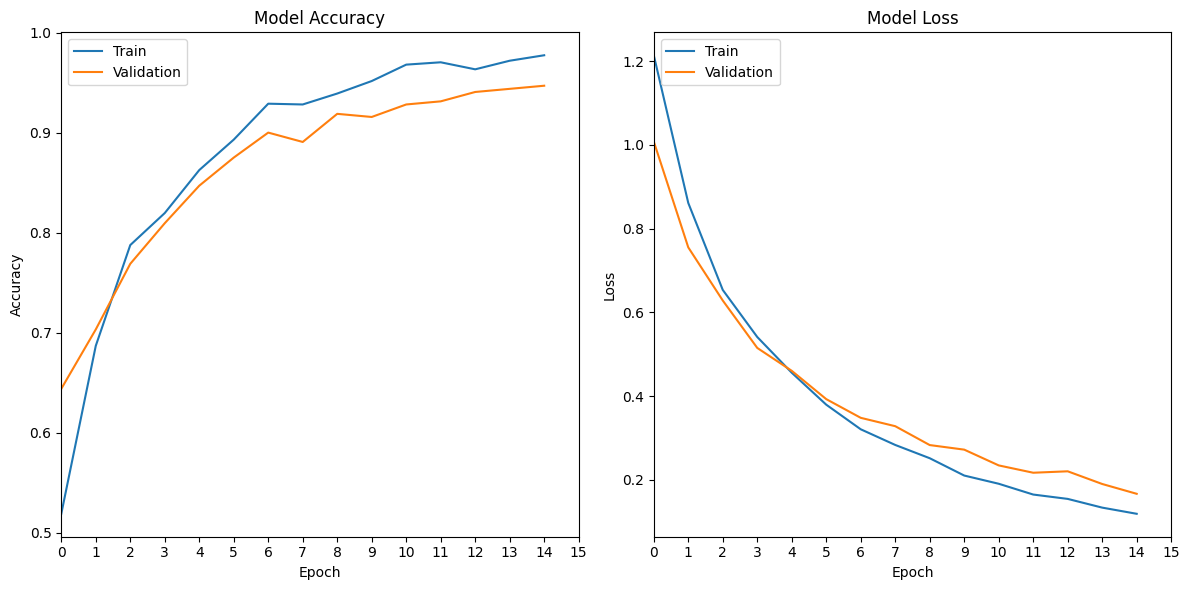

In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['accuracy']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(history.history['loss']) + 1, 1))  # Set x-axis ticks at every epoch
    plt.xlim(0, len(history.history['loss']))  # Set x-axis scale from 0 to the number of epochs
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# plot the densenet169 model history
plot_history(history_ensemble)

13/13 [==============================] - 185s 14s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


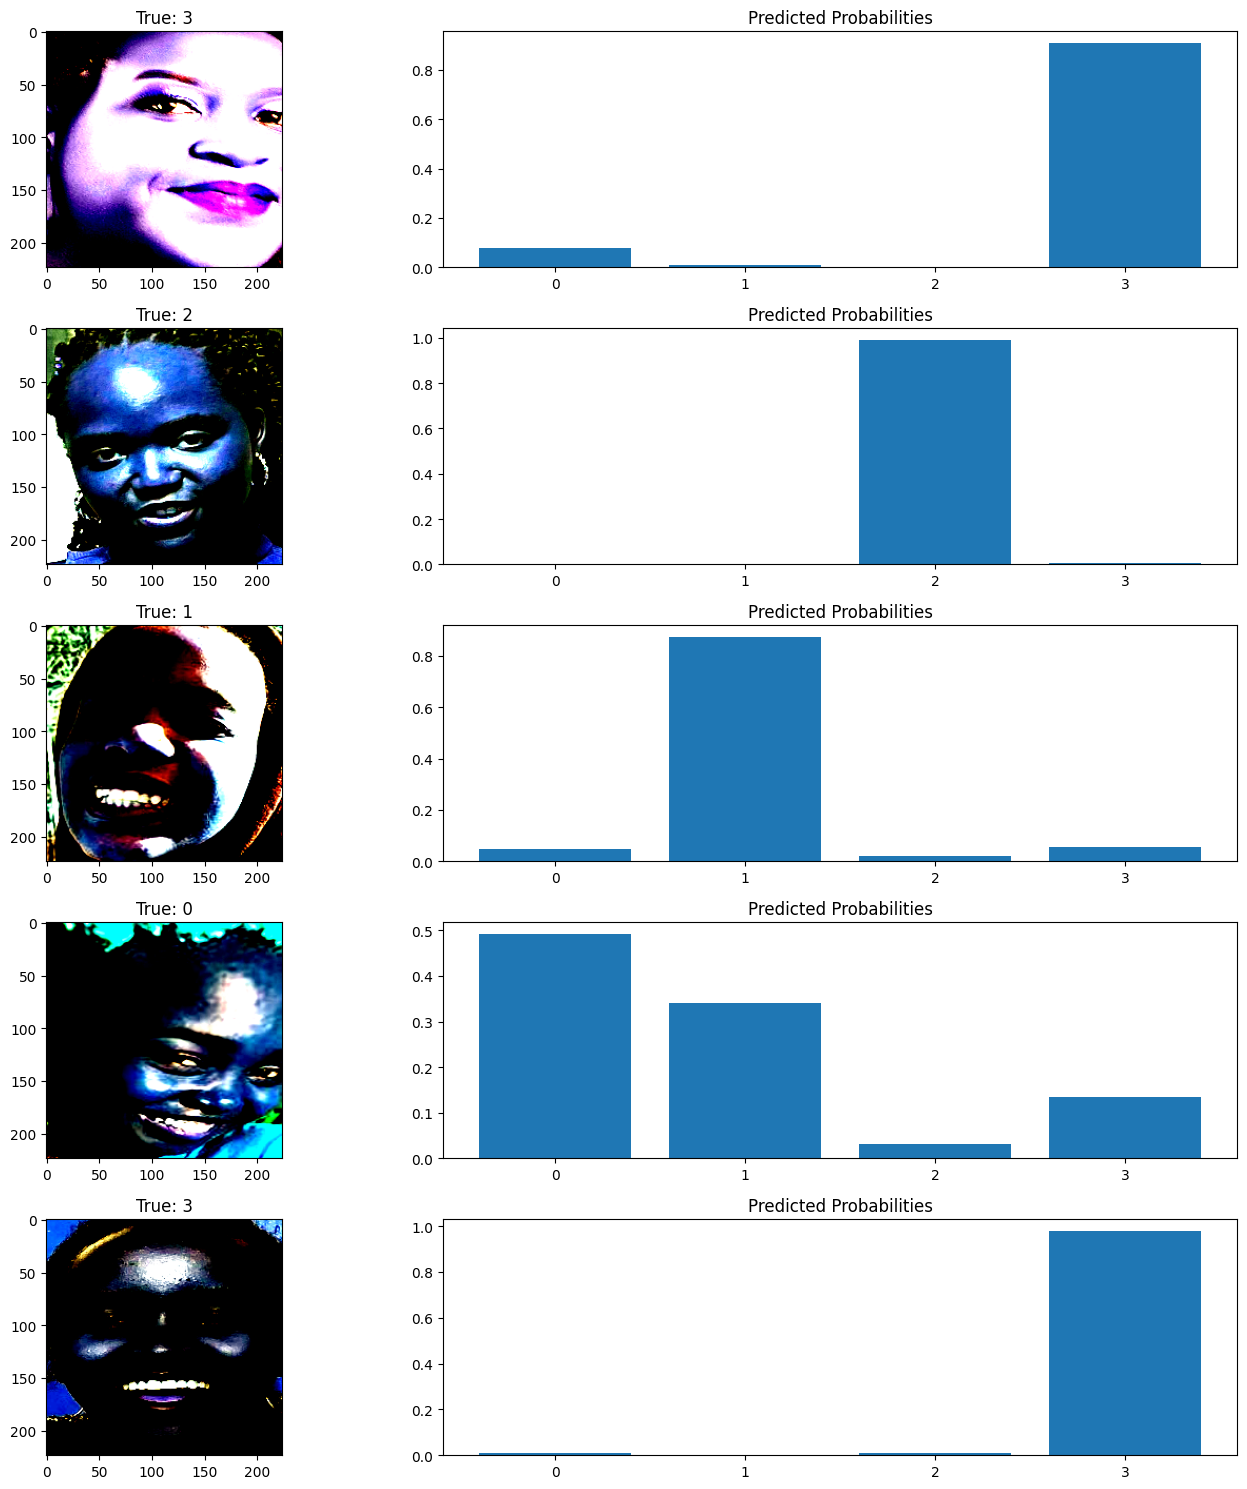

In [25]:
# SOURCE:
# Ngundi, E. (2023). Simple Image Classifier. Retrieved from: https://github.com/edithngundi/Simple-Image-Classifier

import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test_list, y_test, num_samples=5):
    # Generate predictions
    y_pred = model.predict(X_test_list)

    classes = 4

    # Randomly select num_samples samples
    sample_indices = np.random.choice(len(X_test_list[0]), num_samples, replace=False)

    plt.figure(figsize=(15, 3 * num_samples))

    for i, sample_index in enumerate(sample_indices, 1):
        plt.subplot(num_samples, 2, 2 * i - 1)
        plt.imshow(X_test_list[0][sample_index])  # Display the image from the first input
        plt.title(f"True: {y_test[sample_index]}")

        plt.subplot(num_samples, 2, 2 * i)
        plt.bar(range(classes), y_pred[sample_index], tick_label=range(classes))
        plt.title("Predicted Probabilities")

    plt.tight_layout()
    plt.show()

# Assuming X_test is a list containing three separate arrays for each model's input
X_test_list = [X_test, X_test, X_test]

# y_test is a pandas DataFrame
y_test_array = y_test.values 

# Now y_test_array is a NumPy array or list
visualize_predictions(ensemble_model, X_test_list, y_test_array)